In [ ]:
from dataset import AnimalDataset 
from train import train
from resnet18 import ResNet18
from ResNet18Lite import ResNet18Lite
from loss import CrossEntropyLoss
from optimizer import SGD
import matplotlib.pyplot as plt
import numpy as np
import random

data_dir = "/home/an/an_workplace/Lab_CV/Data/animals10" 

dataset = AnimalDataset(data_dir)
print("Tổng số ảnh:", len(dataset))
print("Danh sách lớp:", dataset.classes)


Tính mean và std trên toàn bộ tập ảnh...
Mean: [0.51010316 0.49554803 0.40592592], Std: [0.26384631 0.25836614 0.27701879]
Tổng số ảnh: 10000
Danh sách lớp: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


📊 Đang tính mean/std từng ảnh để vẽ histogram...


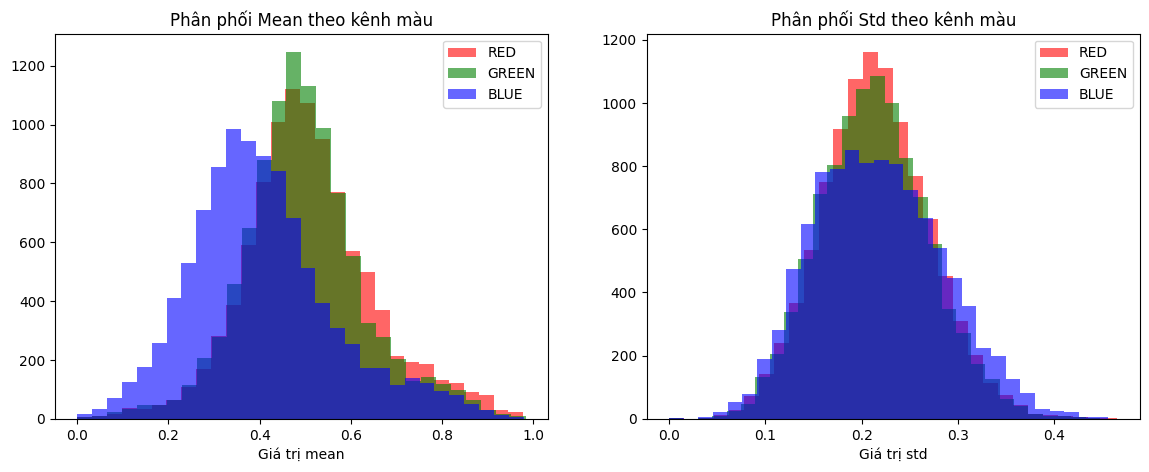

In [2]:
AnimalDataset.plot_dataset_statistics(dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9184713672267533..2.017119322971554].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9333344465846007..2.1445262662270053].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9333344465846007..2.1445262662270053].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9333344465846007..1.9180250337728697].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9333344465846007..1.6783938373723386].


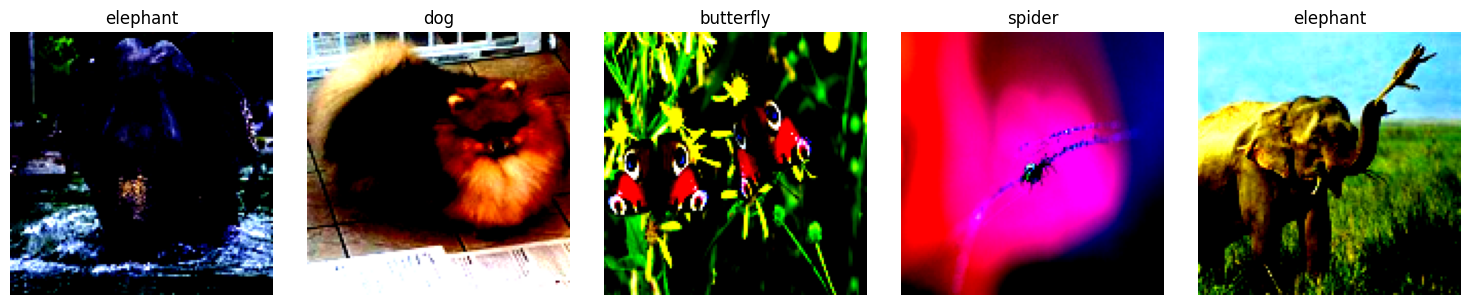

In [3]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    idx = random.randint(0, len(dataset)-1)
    img, label = dataset[idx]
    img = img.transpose(1, 2, 0)  # CHW → HWC để hiển thị
    axs[i].imshow(img)
    axs[i].set_title(dataset.classes[label])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


/tmp/ipykernel_60280/1842735393.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/an/miniconda3/envs/cv_env_py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


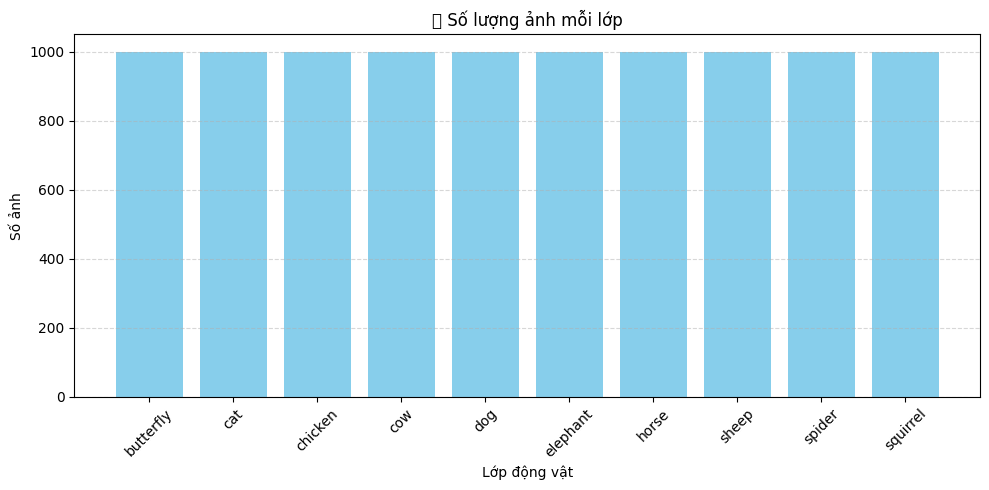

In [4]:
from collections import Counter
label_counts = Counter(dataset.labels)
class_names = [dataset.classes[i] for i in label_counts.keys()]
counts = list(label_counts.values())

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel("Lớp động vật")
plt.ylabel("Số ảnh")
plt.title("📊 Số lượng ảnh mỗi lớp")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [5]:
def load_model(model, path="checkpoint.npz"):
    data = np.load(path)
    model.fc.weights = data['weights']
    model.fc.bias = data['bias']


In [ ]:
# model = ResNet18(num_classes=len(dataset.classes))
model = ResNet18Lite(num_classes=len(dataset.classes))

try:
    load_model(model, "checkpoint_epoch1.npz")
    print("Loaded checkpoint thành công!")
except FileNotFoundError:
    print("Không tìm thấy checkpoint, train từ đầu.")
loss_fn = CrossEntropyLoss()

optimizer = SGD(parameters=[], lr=0.01)

Loaded checkpoint thành công!


In [7]:
losses = train(model, dataset, loss_fn, optimizer, epochs=10, batch_size=8)


Epoch 1/10 bắt đầu...

Batch 1 ─ Bắt đầu
 [Model] Forward
[Model] Forward DONE in 13.48817753791809 seconds
 [Loss] Tính toán CrossEntropy
 [Loss] Backward từ output
 [Linear] Backward FC layer
 [Optimizer] Cập nhật tham số
  Batch done

Batch 2 ─ Bắt đầu
 [Model] Forward
[Model] Forward DONE in 13.32003402709961 seconds
 [Loss] Tính toán CrossEntropy
 [Loss] Backward từ output
 [Linear] Backward FC layer
 [Optimizer] Cập nhật tham số
  Batch done

Batch 3 ─ Bắt đầu
 [Model] Forward
[Model] Forward DONE in 13.741186380386353 seconds
 [Loss] Tính toán CrossEntropy
 [Loss] Backward từ output
 [Linear] Backward FC layer
 [Optimizer] Cập nhật tham số
  Batch done

Batch 4 ─ Bắt đầu
 [Model] Forward
[Model] Forward DONE in 14.6412832736969 seconds
 [Loss] Tính toán CrossEntropy
 [Loss] Backward từ output
 [Linear] Backward FC layer
 [Optimizer] Cập nhật tham số
  Batch done

Batch 5 ─ Bắt đầu


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Biểu đồ mất mát trong quá trình huấn luyện')
plt.grid(True)
plt.show()

NameError: name 'losses' is not defined